# LIBRARIES

In [1]:
#Importing libraries
import pandas #For dataframes
import numpy #For mathemantical operations
import matplotlib.pyplot as plot #for plots
from string import punctuation as punc #For removing punctuations
from collections import Counter #For keeping the count value 
from math import log #for using log function


# DERIVING GRADIENT DESCENT

In [2]:
#******************deriving gradient descent********************
def gradient_descent(x,y,learning_rate):
    m = 0 #intializing with 0
    b = 0 #intializing with 0  
    n = len(x)
    mc = 0 #intializing with 0
    bc = 0 #intializing with 0
    y_p = m * x[:,0] + b  #calculating the predicted outcome
    
    md = -(2/n)*sum(x[:,0]*(y-y_p)) #factor to change the weight value
    bd = -(2/n)*sum(y-y_p) #factor to change the bais value
    mc = mc - learning_rate *md #changing weight value
    bc = bc - learning_rate *bd   #changing bais value

# DATA PRE PROCESSING

,Text,Sentiment
0,Love luv lubb the Da Vinci Code!,1
1,"Da Vinci Code = Up, Up, Down, Down, Left, Righ...",0
2,"Anyway, thats why I love "" Brokeback Mountain.",1
3,My dad's being stupid about brokeback mountain...,0
4,Murderball-Immediately after Crash won the Osc...,0
...,...,...
7081,My dad's being stupid about brokeback mountain...,0
7082,da vinci code was an awesome movie...,1
7083,man i loved brokeback mountain!,1
7084,I love Harry Potter..,1


{'i': 1, 'the': 2, 'and': 3, 'potter': 4, 'harry': 5, 'vinci': 6, 'da': 7, 'brokeback': 8, 'mountain': 9, 'code': 10, 'love': 11, 'is': 12, 'a': 13, 'was': 14, 'awesome': 15, 'impossible': 16, 'mission': 17, 'like': 18, 'to': 19, 'movie': 20, 'it': 21, 'that': 22, 'because': 23, 'sucks': 24, 'sucked': 25, 'hate': 26, 'so': 27, 'as': 28, 'my': 29, 'much': 30, 'of': 31, 'really': 32, 'movies': 33, 'stupid': 34, 'you': 35, 'down': 36, 'but': 37, 'be': 38, 'with': 39, 'just': 40, 'one': 41, 'suck': 42, 'know': 43, '3': 44, 'out': 45, 'or': 46, 'am': 47, 'loved': 48, 'want': 49, 'into': 50, 'which': 51, 'right': 52, 'for': 53, 'an': 54, 'we': 55, 'me': 56, 'this': 57, 'think': 58, 'are': 59, 'not': 60, 'how': 61, 'its': 62, 'if': 63, 'depressing': 64, 'people': 65, 'who': 66, 'his': 67, 'horrible': 68, 'would': 69, 'up': 70, 'reading': 71, 'why': 72, 'series': 73, 'were': 74, 'in': 75, 'only': 76, 'terrible': 77, 'fucking': 78, 'story': 79, 'oh': 80, 'she': 81, 'being': 82, 'left': 83, 'ok'

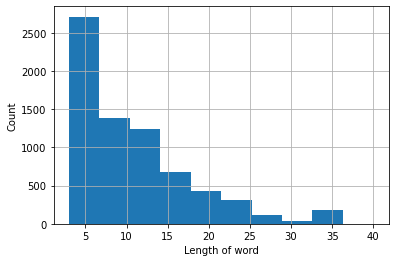

count    7086.000000
mean       10.725374
std         7.161151
min         3.000000
25%         5.000000
50%         8.000000
75%        14.000000
max        40.000000
dtype: float64

In [3]:
#Removing Punctuations from sentence 
def Remove_Punctuation(S):
    R = ''.join([i for i in S if i not in punc]) #String joining after removing punctuation
    return R
#reading data file
dataf = pandas.read_csv("data.csv")
#randomizing rows
dataf = dataf.sample(frac=1).reset_index(drop=True)
display(dataf)
# converting to lower case
dataf["Text"]=dataf["Text"].str.lower()
#Removing Punctuations from sentence 
dataf["Text"] =  dataf["Text"].map(lambda x: Remove_Punctuation(str(x)))
dataf.head() #For printing only first 5 rows of dataframe

all_text = ' '.join(dataf["Text"])
# create a list of words
words = all_text.split()
# Count all the words using Counter Method
count_words = Counter(words) #Count of each word
total_words = len(words) #Total words
sorted_words = count_words.most_common(total_words) #common and unique words
Word_To_Integer = {w:i+1 for i, (w,c) in enumerate(sorted_words)} #Encoding the words
print(Word_To_Integer)
Text_In_Integer = []
for review in dataf["Text"]:
    r_s = [Word_To_Integer[w] for w in review.split()] #spliting it to list
    Text_In_Integer.append(r_s)

#plotting average length of sentence
text_length = [len(x) for x in Text_In_Integer]
pandas.Series(text_length).hist()
plot.xlabel("Length of word")
plot.ylabel("Count")
plot.show()

pandas.Series(text_length).describe()







# DENSE REPRESENTATION

In [4]:
#*****************CONVERTING OUR DATA IN DENSE REPRESENTATION*************************

# I love Harry potter will be represented by [0 0 0 0 0 0 0 0 1 11 5 4]
# I was awesome will be represented by [0 0 0 0 0 0 0 0 0 1 14 15]
#avg length of sentence
#sentence having words less then it is padded by 0
#sentence having words greater than it is discarded
sequence_length = 12
all_features = numpy.zeros((len(Text_In_Integer), sequence_length), dtype = int) #making array of zeros of length of text_in_interger x sequence length

for i, review in enumerate(Text_In_Integer):
    review_length = len(review) #Length of revirw

    if review_length <= sequence_length:
        zeroes = list(numpy.zeros(sequence_length-review_length)) #making list of numpy array of zeros on condition fulfilment
        new = zeroes+review
    elif review_length > sequence_length:
        new = review[0:sequence_length] #Slicing review list based on sequence length

    all_features[i,:] = numpy.array(new) #assigning result calculated above 

length_feature = len(all_features) #length of features



# SPLITING DATA

In [5]:
#spliting data set into trainnig and testing
split_fraction_rate = 0.9 #The factor by which testing and training dataset needs to be split
train_x = all_features[0:int(split_fraction_rate*length_feature)] #slicing all features based on split factor and max length of feature calculated above for training data
train_y = dataf["Sentiment"][0:int(split_fraction_rate*length_feature)] #slicing result based on split factor and max length of feature calculated above for training data
test_x = all_features[int(split_fraction_rate*length_feature):] #slicing all features based on split factor and max length of feature calculated above for testing data
test_y = dataf["Sentiment"][int(split_fraction_rate*length_feature):] #slicing all result based on split factor and max length of feature calculated above for testing data
test_y = test_y.reset_index() #reseting index of result of test data
test_y = test_y["Sentiment"]

# TRAINING

<ipython-input-6-639f02543162>:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + numpy.exp(-x))


EPOCH: 0 ACCURACY: 53.35 %
EPOCH: 1 ACCURACY: 55.79 %
EPOCH: 2 ACCURACY: 57.74 %
EPOCH: 3 ACCURACY: 59.37 %
EPOCH: 4 ACCURACY: 57.66 %
EPOCH: 5 ACCURACY: 56.45 %
EPOCH: 6 ACCURACY: 62.49 %
EPOCH: 7 ACCURACY: 58.49 %
EPOCH: 8 ACCURACY: 59.48 %
EPOCH: 9 ACCURACY: 64.0 %
EPOCH: 10 ACCURACY: 61.38 %
EPOCH: 11 ACCURACY: 66.08 %
EPOCH: 12 ACCURACY: 64.7 %
EPOCH: 13 ACCURACY: 65.45 %
EPOCH: 14 ACCURACY: 66.85 %
EPOCH: 15 ACCURACY: 65.34 %
EPOCH: 16 ACCURACY: 64.48 %
EPOCH: 17 ACCURACY: 58.6 %
EPOCH: 18 ACCURACY: 62.51 %
EPOCH: 19 ACCURACY: 58.74 %
EPOCH: 20 ACCURACY: 58.3 %


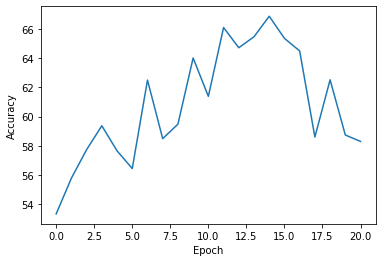

In [6]:
neurons_input_layer = sequence_length #as neurons of input layer is equal to length of sequence here 
neurons_hidden_layer = 55 #Calculated from neurons of input layer and output layer
neurons_output_layer = 1 #As there will be one output(parameter) against each reuslt

learning_rate = 0.001  #learning Rate
epochs = 20 #No of iterations to perform for training



# weight values
#Initializing random weights 
w0 = numpy.random.normal(0, 1, [neurons_input_layer, neurons_hidden_layer]) 
w1 = numpy.random.normal(0, 1, [neurons_hidden_layer, neurons_output_layer])
wh = numpy.random.normal(0, 2, [neurons_hidden_layer, neurons_hidden_layer])


# delta values
d0 = numpy.zeros_like(w0)
d1 = numpy.zeros_like(w1)
dh = numpy.zeros_like(wh)


def sigmoid(x): #Activation function
    return 1 / (1 + numpy.exp(-x))

def log_loss(out): #loss function
    return out * (1 - out)


accuracy_list=[] #contain all the accuracy at the end of epoch
epoch_count=range(0,epochs+1)  #list of all epoch values

error_val = 0 #initializing error value
for iteration in range(epochs + 1): #Iteration of epochs
    accuracy_value = 0 #initalizing accuracy value
    prediction_list = [] #account all predictions
    output_deltas = list() #contain outcomes
    hidden_values = list() #hidden values for hidden layer
    overall_error = 0 # total error in the whole calculation process.
    hidden_values.append(numpy.zeros(neurons_hidden_layer)) #adding array of zeros of size neurons of hidden layer to a list
    future_delta = numpy.zeros(neurons_hidden_layer) #assigning array of zeros of size neurons of hidden layer to future delta

    pred = numpy.zeros_like(train_y) #assigning array of zeros of size of result of training dataset 
    
        
#*******************FORWARD PROPAGATION*******************
    for i in range(len(train_x)):
        #output_err = 0
        X = numpy.array([train_x[i]]) #input 
        Y = numpy.array([[train_y[i]]]) #actual output
        
        hidden = sigmoid(numpy.dot(X, w0) + numpy.dot(hidden_values[-1], wh)) #computation of hidden value on the basis of activation function
        output = sigmoid(numpy.dot(hidden, w1)) #computation of output by computed hidden value on the basis of activation function
        pred= numpy.round(output[0][0]) #predicted output
        prediction_list.append(pred)  #Appending prediction value to prediction list
        #log loss
        output_error = Y - output #Calculating error on the basis of calculated result and expected result
        output_deltas.append(output_error * log_loss(output)) #it will be further used for updating the weight values
        hidden_values.append(hidden) #appending hidden value calculated above
        overall_error += numpy.abs(output_error[0][0]) #calculating overallerror with conversion of all negative value to postive value
        
# *******************BACKGROUND PROPAGATION*******************

    for i in range(len(train_x)):
        X = numpy.array([train_x[i]]) #input
        Y = numpy.array([[train_y[i]]]) #actual output
        pred = prediction_list[i] #predicted output
        hidden = hidden_values[-(i + 1)] #current hidden value
        prev_hidden = hidden_values[-(i + 2)] #previous hidden value
        output_delta = output_deltas[-(i + 1)] #slicing outcomes
        gd = gradient_descent(train_x,train_y,learning_rate)
        hidden_delta = (numpy.dot(future_delta, wh.T) + numpy.dot(output_delta, w1.T)) * log_loss(hidden) #calculated hidden outcome
        #computing delta values which will be used below for updating weight values
        d1 += numpy.dot(numpy.atleast_2d(hidden).T, output_delta) 
        dh += numpy.dot(numpy.atleast_2d(prev_hidden).T, hidden_delta)
        d0 += numpy.dot(X.T, hidden_delta)
        future_delta = hidden_delta 
        
        #increamenting accuracy value if prediction become true
        error_val += overall_error
        if (pred == Y):
            accuracy_value += 1
        #updating weights
        w1 += learning_rate * d1
        w0 += learning_rate * d0
        wh += learning_rate * dh
        d1 *= 0
        d0 *= 0
        dh *= 0
    print("EPOCH:",iteration,"ACCURACY:",round(accuracy_value/len(train_x) * 100,2),"%") #Computing accuracy using simple percentage formula
    accuracy_list.append(round(accuracy_value/len(train_x) * 100,2))  #Appending accuracy to accuracy_list


#ploting graph between epoch and accuracy
plot.plot(epoch_count,accuracy_list)
plot.xlabel("Epoch")
plot.ylabel("Accuracy")
plot.show()


# TESTING

In [7]:
test_accuracy = 0 #initiazling test_accuarcy 
hidden_values = list() #hidden values for hidden layer
hidden_values.append(numpy.zeros(neurons_hidden_layer)) #adding array of zeros of size neurons of hidden layer to a list

key_list = list(Word_To_Integer.keys()) #contain key of dictionary Word_to_integer
val_list = list(Word_To_Integer.values()) #contain value of dictionary Word_to_integer
for i in range(len(test_x)):
    sentence = ""
    X = numpy.array([test_x[i]]) #Input parameters of test dataset
    Y = numpy.array([[test_y[i]]]) #expected result from test dataset
    #print(itera,"input:",X.shape,"Actual Output:",Y[0][0])
    hidden = sigmoid(numpy.dot(X, w0) + numpy.dot(hidden_values[-1], wh)) #computation of hidden value on the basis of activation function
    output = sigmoid(numpy.dot(hidden, w1)) #computation of computed output value on the basis of activation function
    pred= numpy.round(output[0][0]) #predicted result
    #print(X[0],Y[0][0])
    
    #the loop define below will convert the integer values of sentence to its given format(String format) for showing output
    for i in X[0]:
        if i != 0:
            sentence = str(sentence) + str(key_list[val_list.index(i)])+" "
        #print(i)

    print(sentence,":",Y[0][0],"\n")    
        
    #increasing the value of accuracy on every true prediction
    if pred==Y[0][0]:
        test_accuracy+=1
print("--------------------------------------------------------------")
print("Test Accuracy is:",round(test_accuracy/len(test_x)*100,2),"%") #accuracy is calculated using simple percentage formula
    

by the way the da vinci code sucked just letting you know  : 0 

mission impossible iii was so awesome  : 1 

dudeee i loved brokeback mountain  : 1 

i love brokeback mountain  : 1 

da vinci code sucks  : 0 

the da vinci code is awesome  : 1 

didnã¢ â€ â™ t see it but much like brokeback mountain donã¢  : 0 

as i sit here watching the mtv movie awards i am reminded  : 0 

i heard da vinci code sucked soo much only 25 stars  : 0 

brokeback mountain sucked my balls  : 0 

brokeback mountain is fucking horrible  : 0 

love luv lubb the da vinci code  : 1 

the da vinci code was awesome i cant wait to read it  : 1 

i love being a sentry for mission impossible and a station for  : 1 

anyway thats why i love brokeback mountain  : 1 

i heard da vinci code sucked soo much only 25 stars  : 0 

mission impossible 2 rocks  : 1 

i fucking hated the da vinci code  : 0 

she helped me bobbypin my insanely cool hat to my head and  : 0 

anyway thats why i love brokeback mountain  : 1 

da v

<ipython-input-6-639f02543162>:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + numpy.exp(-x))


the da vinci code sucked big time  : 0 

harry potter is awesome i dont care if anyone says differently  : 1 

i am going to start reading the harry potter series again because  : 1 

i too like harry potter  : 1 

always knows what i want not guy crazy hates harry potter  : 0 

i liked the first mission impossible  : 1 

oh and brokeback mountain is a terrible movie  : 0 

so brokeback mountain was really depressing  : 0 

da vinci code sucks  : 0 

i heard da vinci code sucked soo much only 25 stars  : 0 

i love harry potter  : 1 

i too like harry potter  : 1 

i too like harry potter  : 1 

ok brokeback mountain is such a horrible movie  : 0 

i love brokeback mountain  : 1 

brokeback mountain was boring  : 0 

i love being a sentry for mission impossible and a station for  : 1 

combining the opinion review from gary and gin zen the da vinci  : 0 

after supper we watched brokeback mountain which is an awesome movie  : 1 

ok brokeback mountain is such a horrible movie  : 0 

i 

i heard da vinci code sucked soo much only 25 stars  : 0 

dudeee i loved brokeback mountain  : 1 

i love harry potter  : 1 

not because i hate harry potter but because i am the type  : 0 

so brokeback mountain was really depressing  : 0 

i hate harry potter that daniel wotshisface needs a fucking slap  : 0 

i think i hate harry potter because it outshines much better reading  : 0 

i love the da vinci code  : 1 

i love harry potter  : 1 

anyway thats why i love brokeback mountain  : 1 

da vinci code sucks  : 0 

brokeback mountain was beautiful  : 1 

i want to be here because i love harry potter and i  : 1 

i love being a sentry for mission impossible and a station for  : 1 

mission impossible 3 tom cruise it sucks i hate action movie eat  : 0 

i love harry potter  : 1 

i love the harry potter series if you can count that as  : 1 

and betterwe all know da vinci code is bogus and inaccurate  : 0 

i like mission impossible  : 1 

anyway thats why i love brokeback mountain

these harry potter movies really suck  : 0 

the people who are worth it know how much i love the  : 1 

i am going to start reading the harry potter series again because  : 1 

rv was really good but mission impossible 3 fucking sucked  : 0 

i love the da vinci code  : 1 

the da vinci code is awesome  : 1 

man i loved brokeback mountain  : 1 

i love brokeback mountain  : 1 

mission impossible of course was awesome as all get out  : 1 

scorebrokeback mountain had a beautiful score  : 1 

da vinci code sucks  : 0 

oh and brokeback mountain is a terrible movie  : 0 

harry potter was sucking his cock  : 0 

man i loved brokeback mountain  : 1 

anyway thats why i love brokeback mountain  : 1 

brokeback mountain is so depressing  : 0 

i liked the first mission impossible  : 1 

i hated the ending to brokeback mountain  : 0 

i love the harry potter series if you can count that as  : 1 

booki love the harry potter books  : 1 

ok brokeback mountain is such a horrible movie  : 0 
